K = 1, Accuracy = 0.98
K = 2, Accuracy = 0.98
K = 3, Accuracy = 1.00
K = 4, Accuracy = 0.98
K = 5, Accuracy = 1.00
K = 6, Accuracy = 1.00
K = 7, Accuracy = 1.00
K = 8, Accuracy = 1.00
K = 9, Accuracy = 1.00
K = 10, Accuracy = 1.00
K = 11, Accuracy = 1.00
K = 12, Accuracy = 1.00
K = 13, Accuracy = 1.00
K = 14, Accuracy = 1.00
K = 15, Accuracy = 1.00


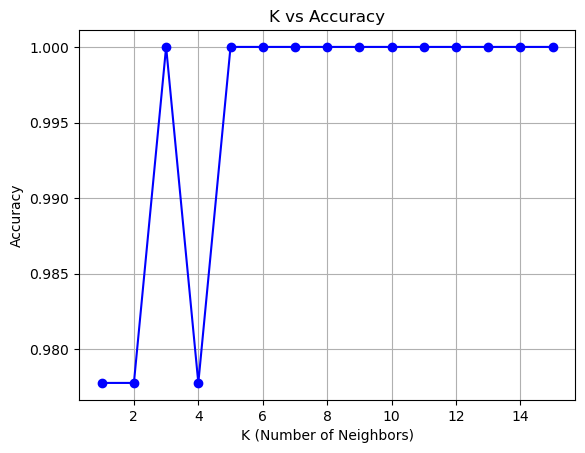


Best K: 3, Best Accuracy: 1.00


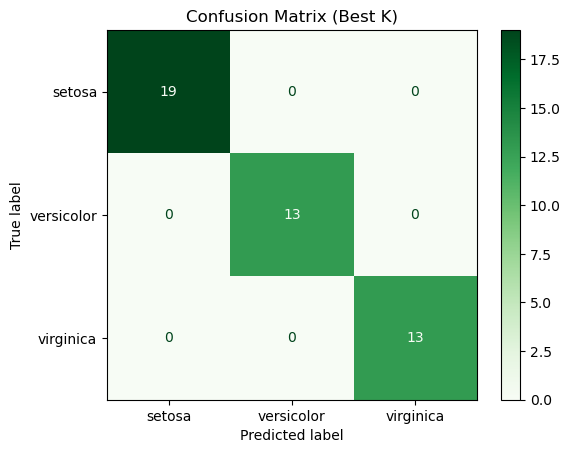

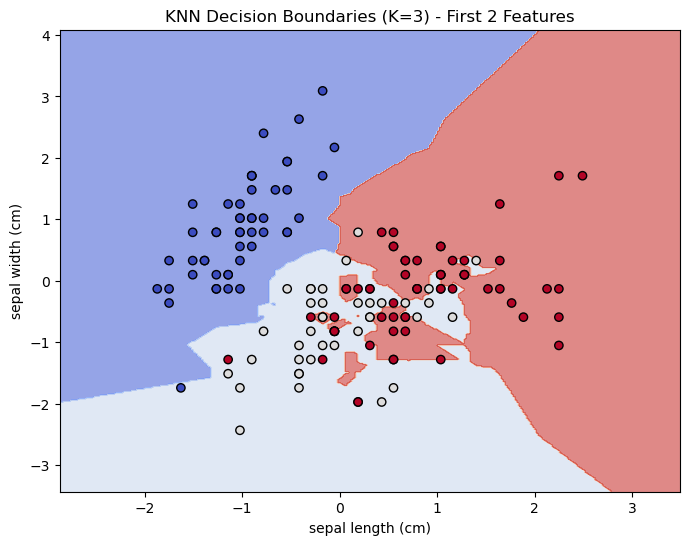

In [2]:
# KNN Classifier on Iris Dataset (Complete Code)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN for Different K Values
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.2f}")

# Plot Accuracy vs K
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("K vs Accuracy")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Confusion Matrix for Best K
best_k = k_values[np.argmax(accuracies)]
print(f"\nBest K: {best_k}, Best Accuracy: {max(accuracies):.2f}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix (Best K)")
plt.show()

# Optional: Visualize Decision Boundaries (Using First 2 Features)
X_2d = X_scaled[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title(f"KNN Decision Boundaries (K={best_k}) - First 2 Features")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
